# Audio Tabular Features Extraction With *Librosa* Tutorial
## Overview

This tutorial focuses on extracting audio features and creating a tabular dataframe for future ML projects with easy interpretation.

We'll use **`librosa`** package extract features.

## Motivation
Having audio features in a tabular form is important because it makes the data easier to interpret and understand. Additionally, tabular data is compatible with a wide range of simple machine learning models, allowing us to apply powerful analysis techniques to audio without needing complex models. By transforming raw audio into structured data, we make it easier to explore patterns, compare songs, and use these features for tasks like classification and prediction.

## Key Components
Each feature, will be explained to show its importance in analyzing audio pieces (songs) for machine learning applications.

## Setup
 Let's start by importing the necessary libraries

In [ ]:
import librosa
from IPython.display import Audio
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Load our data
we will load two different songs to demonstrate each feature components and finally create a dataframe with those two samples.

with **`librosa`** we load the **audio time series** as numpy array called `y_rock` and `y_piano` and the **sampling rate (Hertz)** as `sr_rock` and `sr_piano`

In [ ]:
# we make sure we load the 2 songs with the same Hertz (sampling rate)
desired_sr = 44100
y_rock, sr_rock = librosa.load('/content/rock_example_song.mp3', sr=desired_sr)
y_piano, sr_piano = librosa.load('/content/piano_example_song.mp3', sr=desired_sr)

In [ ]:
print(f"Original sampling rate for rock song: {librosa.get_samplerate('/content/rock_example_song.mp3')}")
print(f"Original sampling rate for quiet song: {librosa.get_samplerate('/content/piano_example_song.mp3')}")

# confirm the resampled sampling rate
print(f"\nResampled sampling rate for rock song: {sr_rock}")  # Should be 44100
print(f"Resampled sampling rate for piano song: {sr_piano}")  # Should be 44100

Original sampling rate for rock song: 44100
Original sampling rate for quiet song: 48000

Resampled sampling rate for rock song: 44100
Resampled sampling rate for piano song: 44100


Ok great! we have the songs, **lets listen and dance**:

In [1]:
#Audio(data=y_rock, rate=sr_rock)

In [2]:
#Audio(data=y_piano, rate=sr_piano)

Quite different right?

Let's check how different the songs are by looking at their waveforms with `librosa.display.waveshow`

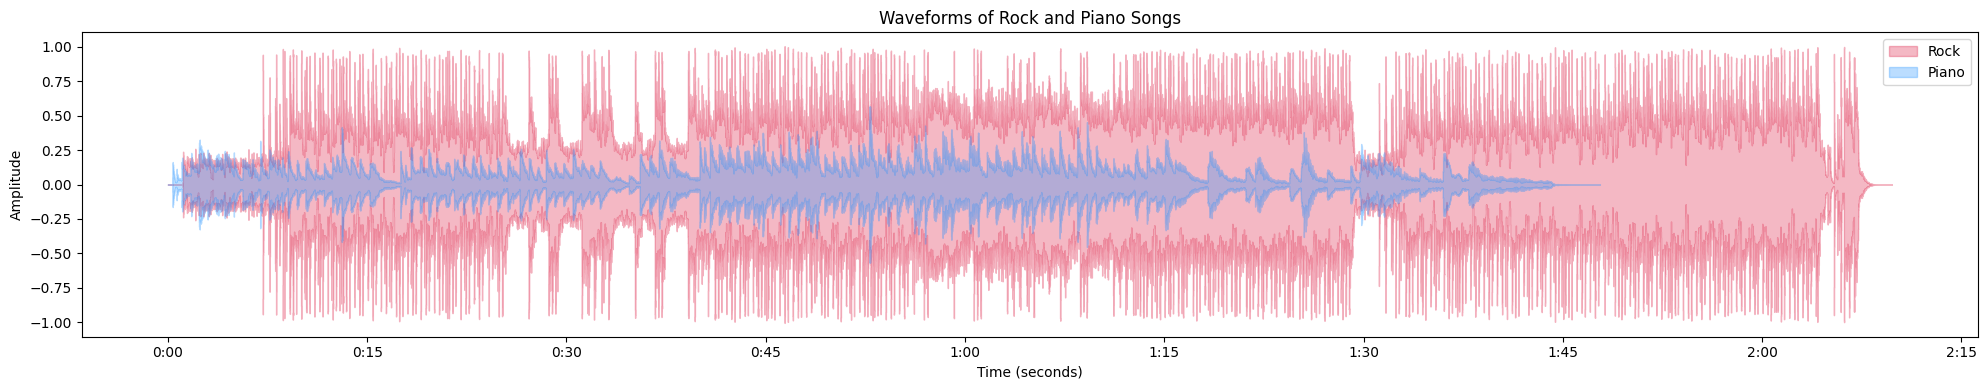

In [ ]:
plt.figure(figsize=(20, 4))
librosa.display.waveshow(y=y_rock, sr=sr_rock, alpha=0.3, label='Rock', color = '#DC143C')
librosa.display.waveshow(y=y_piano, sr=sr_piano, alpha=0.3, label='Piano', color = '#1E90FF')

plt.title('Waveforms of Rock and Piano Songs')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.legend()
plt.show()

In the plot above, we see the amplitude (vertical axis) of the two songs over time (horizontal axis).

- The **rock song** (in red) has much higher peaks and more variation, showing a more energetic and dynamic sound.
- The **piano song** (in blue) has smaller, smoother changes in amplitude, indicating a calmer and more consistent sound.

This comparison helps us visually understand how the intensity and dynamics of each song differ.

### Lets start with extracting some features:

#### Beats:

first, I apply `librosa.beat.beat_track()` to detect the **beats** and the **tempo** (beats per minute - BPM) in both songs.

In [ ]:
tempo_rock, beat_frames_rock = librosa.beat.beat_track(y=y_rock, sr=sr_rock)
tempo_piano, beat_frames_piano = librosa.beat.beat_track(y=y_piano, sr=sr_piano)

In [ ]:
beat_frames_rock

array([   99,   136,   173,   209,   252,   294,   338,   381,   424,
         467,   505,   543,   580,   618,   661,   704,   747,   790,
         833,   876,   919,   962,  1005,  1048,  1091,  1135,  1177,
        1220,  1264,  1307,  1349,  1393,  1436,  1479,  1522,  1565,
        1608,  1652,  1694,  1737,  1780,  1824,  1866,  1909,  1953,
        1996,  2038,  2082,  2125,  2168,  2210,  2253,  2297,  2340,
        2382,  2425,  2469,  2512,  2555,  2598,  2641,  2684,  2727,
        2771,  2814,  2857,  2899,  2942,  2986,  3029,  3071,  3114,
        3158,  3202,  3244,  3287,  3330,  3373,  3417,  3460,  3503,
        3546,  3589,  3632,  3675,  3719,  3761,  3804,  3848,  3891,
        3934,  3977,  4020,  4063,  4106,  4149,  4192,  4235,  4278,
        4321,  4364,  4408,  4450,  4493,  4537,  4580,  4623,  4666,
        4709,  4752,  4795,  4838,  4881,  4924,  4968,  5011,  5054,
        5097,  5140,  5183,  5226,  5269,  5312,  5355,  5398,  5439,
        5478,  5521,

In [ ]:
beat_frames_piano

array([  29,   90,  147,  202,  257,  311,  366,  429,  486,  543,  600,
        656,  713,  778,  837,  894,  954, 1013, 1067, 1128, 1186, 1243,
       1310, 1377, 1443, 1509, 1575, 1633, 1690, 1741, 1799, 1857, 1917,
       1970, 2024, 2079, 2136, 2187, 2238, 2283, 2341, 2394, 2451, 2508,
       2565, 2625, 2681, 2739, 2800, 2864, 2928, 2991, 3060, 3120, 3184,
       3252, 3318, 3383, 3448, 3515, 3573, 3629, 3686, 3740, 3795, 3857,
       3916, 3971, 4025, 4082, 4143, 4204, 4259, 4314, 4369, 4423, 4479,
       4547, 4605, 4665, 4725, 4782, 4838, 4908, 4966, 5022, 5078, 5136,
       5194, 5252, 5310, 5367, 5422, 5478, 5535, 5604, 5664, 5720, 5779,
       5837, 5896, 5959, 6017, 6074, 6129, 6194, 6270, 6346, 6408, 6468,
       6528, 6584, 6640, 6696, 6751, 6810, 6869, 6928, 6987, 7050, 7106,
       7162, 7217, 7272, 7333, 7394, 7455, 7515, 7566, 7617, 7668, 7736,
       7808, 7881, 7940, 7999, 8058, 8116, 8167, 8218, 8269])

These arrays represent the positions of each beat in the song, given in terms of frame indices (not seconds or other time frame). Each number in these arrays shows where a beat occurs in the audio.

For this toturial on tabular features we will calculate both the BPM and the total beats as seperated features:

In [ ]:
beat_count_rock = len(beat_frames_rock)
beat_count_piano = len(beat_frames_piano)

In [ ]:
print(f"Total beats for rock song: {beat_count_rock}")
print(f"Total beats for quiet song: {beat_count_piano}")
print(f"\nBPM for rock song: {tempo_rock[0]}")
print(f"BPM for quiet song: {tempo_piano[0]}")

Total beats for rock song: 252
Total beats for quiet song: 141

BPM for rock song: 120.18531976744185
BPM for quiet song: 86.1328125


##### What we can learn from this?
- The **rock song** obviously has a faster tempo (120.1 BPM) and more frequent beats, as seen in the `beat_frames_rock` array, where the numbers are closer together.
- The **piano song** has a slower tempo (86.1 BPM) and fewer beats, as seen in the**`beat_frames_quiet` array, where the numbers are more spread out.

In short, those features help us to learn that the rock song is faster and more rhythmic, while the piano song is slower and more relaxed.

#### Harmonic and percussive components

- **Harmonic components** represent the musical tones and melodies (like vocals, strings, etc.).
- **Percussive components** represent the rhythm section, including drums, cymbals, and other percussion sounds.

In [ ]:
S_rock = librosa.stft(y_rock)
S_piano = librosa.stft(y_piano)

# Decompose (HPSS) I use margin = 5.0 for a better cut between the harmonic and percussive
H_rock, P_rock = librosa.decompose.hpss(S_rock, margin=5.0)
H_piano, P_piano = librosa.decompose.hpss(S_piano, margin=5.0)

# inverse STFT to get time-domain audio
y_harmonic_rock = librosa.istft(H_rock)
y_percussive_rock = librosa.istft(P_rock)
y_harmonic_piano = librosa.istft(H_piano)
y_percussive_piano = librosa.istft(P_piano)

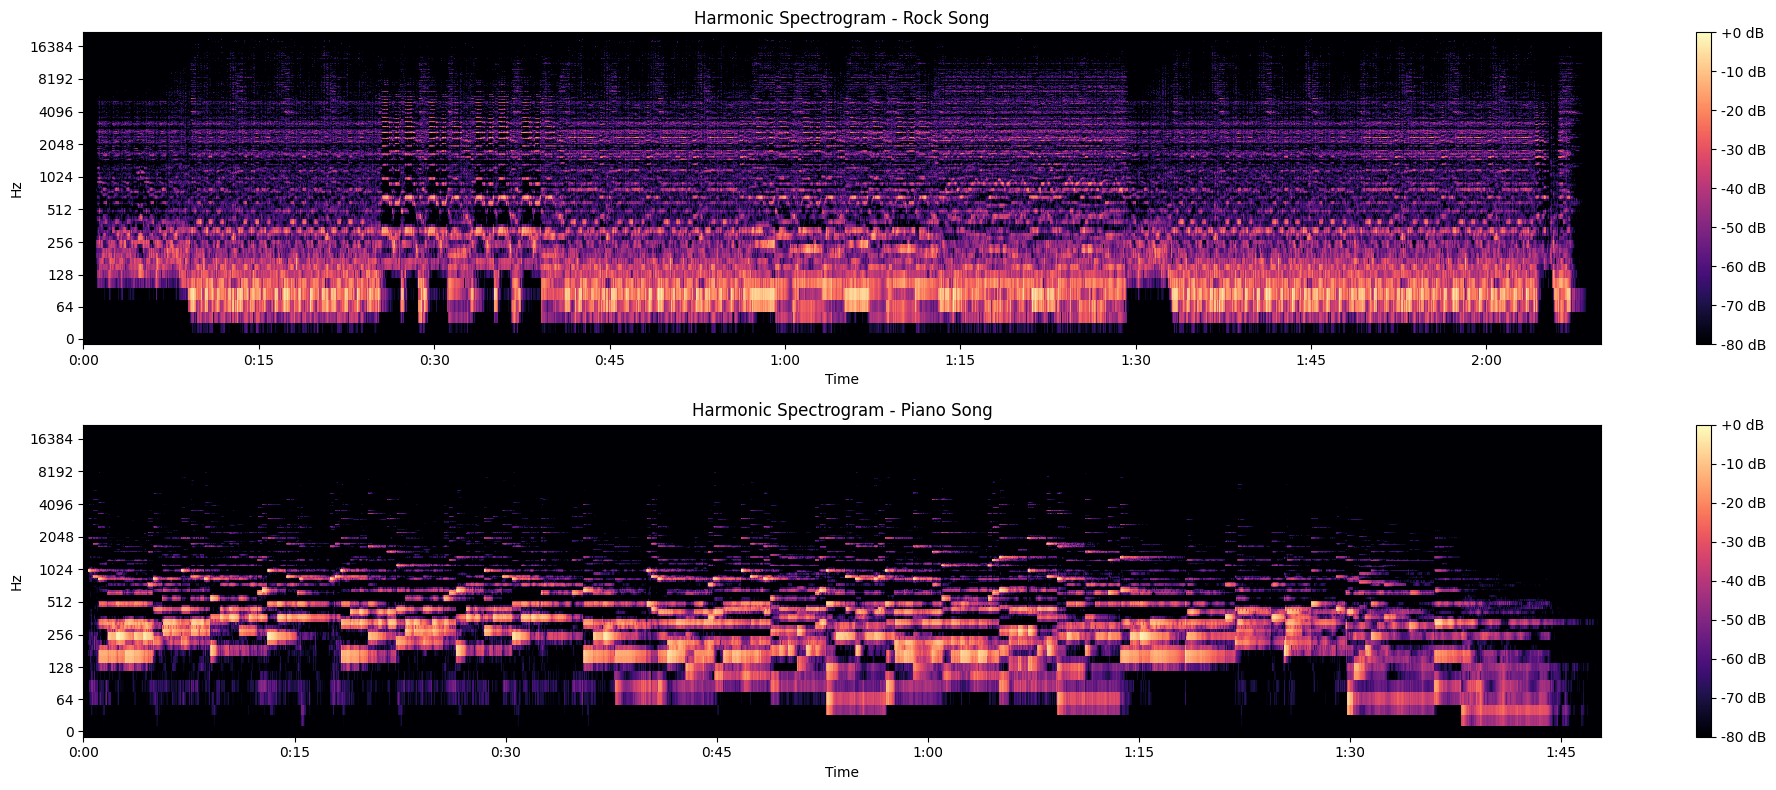

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(H_rock), ref=np.max),
    sr=sr_rock, y_axis='log', x_axis='time')
plt.title('Harmonic Spectrogram - Rock Song')
plt.colorbar(format="%+2.0f dB")

plt.subplot(2, 1, 2)
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(H_piano), ref=np.max),
    sr=sr_piano, y_axis='log', x_axis='time')
plt.title('Harmonic Spectrogram - Piano Song')
plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()

<ipython-input-15-09c9634427f4>:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


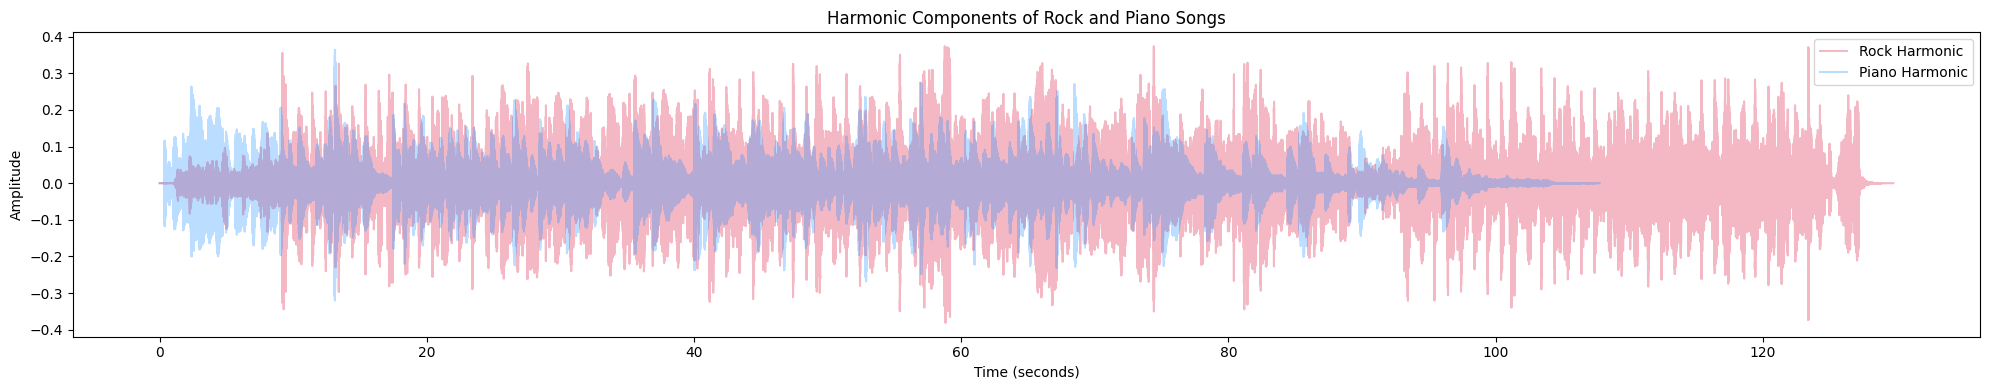

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(np.arange(len(y_harmonic_rock)) / sr_rock, y_harmonic_rock, alpha=0.3, label='Rock Harmonic', color = '#DC143C')
plt.plot(np.arange(len(y_harmonic_piano)) / sr_piano, y_harmonic_piano, alpha=0.3, label='Piano Harmonic', color = '#1E90FF')

plt.title("Harmonic Components of Rock and Piano Songs")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

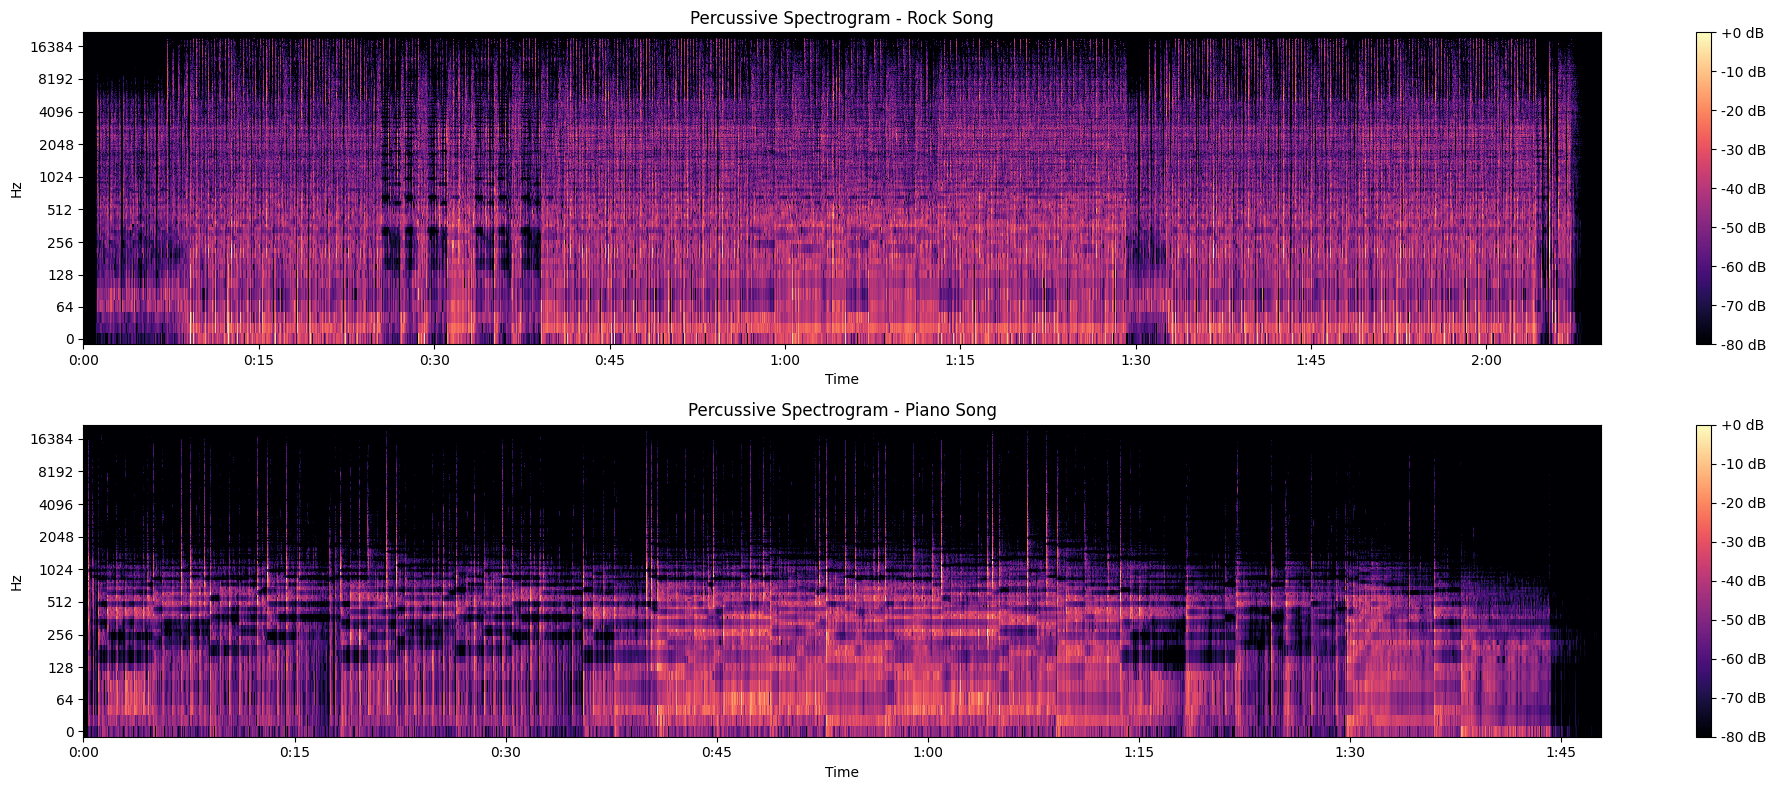

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(P_rock), ref=np.max),
    sr=sr_rock, y_axis='log', x_axis='time')
plt.title('Percussive Spectrogram - Rock Song')
plt.colorbar(format="%+2.0f dB")

plt.subplot(2, 1, 2)
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(P_piano), ref=np.max),
    sr=sr_piano, y_axis='log', x_axis='time')
plt.title('Percussive Spectrogram - Piano Song')
plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()

<ipython-input-17-a922160dd934>:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


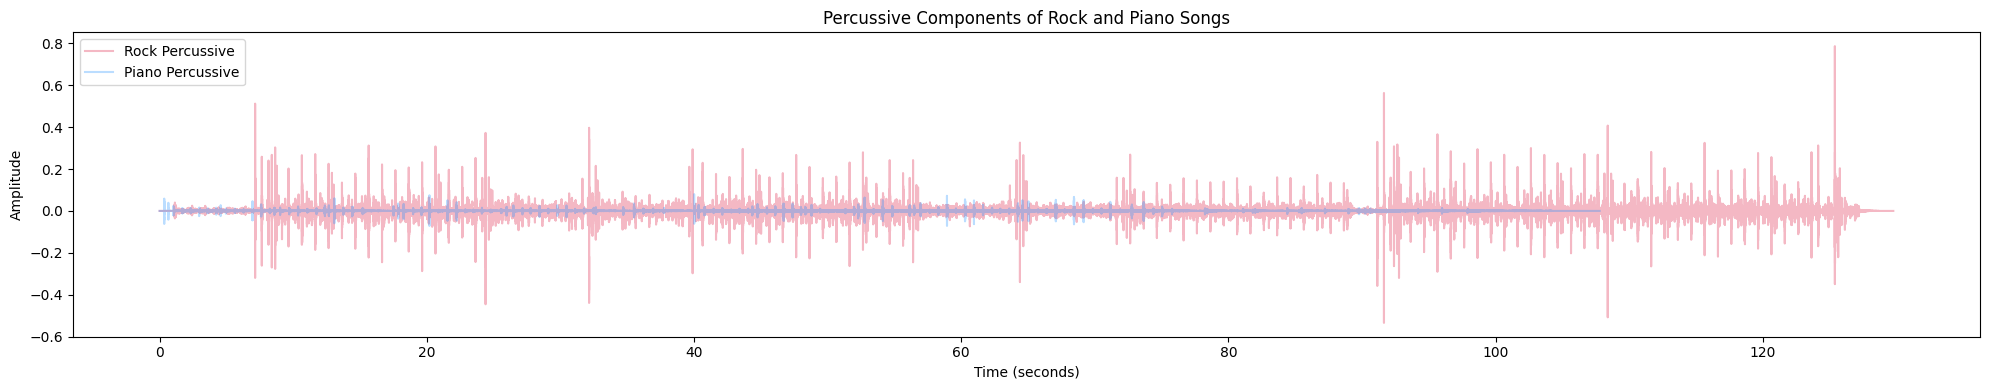

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(np.arange(len(y_percussive_rock)) / sr_rock, y_percussive_rock, alpha=0.3, label='Rock Percussive', color = '#DC143C')
plt.plot(np.arange(len(y_percussive_piano)) / sr_piano, y_percussive_piano, alpha=0.3, label='Piano Percussive', color = '#1E90FF')

plt.title("Percussive Components of Rock and Piano Songs")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

As we see in the graphs above, rock music tends to have constant harmonic content — guitars, basslines, vocals — all rich in harmonics.The energy is spread across time and the The rich harmonic content and frequent changes match typical characteristics of rock: dynamic and harmonically dense. the piano song is less dense and less consistent, and energy levels are lower overall.

### Now lets make tabular features: Harmonic and Percussive Components

We extracted simple tabular features from the harmonic and percussive parts of our two songs.  
For each component, we computed the following features:
- **Mean** and **Median** (using absolute values to reflect magnitude)
- **Min** and **Max** (to capture the dynamic range)

The purpose of these features is to give us a basic idea of how intense or sparse each signal is across time.


In [ ]:
# harmonic
harmonic_rock_mean = np.mean(np.abs(y_harmonic_rock))
harmonic_rock_median = np.median(np.abs(y_harmonic_rock))
harmonic_rock_min = np.min(y_harmonic_rock)
harmonic_rock_max = np.max(y_harmonic_rock)

harmonic_piano_mean = np.mean(np.abs(y_harmonic_piano))
harmonic_piano_median = np.median(np.abs(y_harmonic_piano))
harmonic_piano_min = np.min(y_harmonic_piano)
harmonic_piano_max = np.max(y_harmonic_piano)

## percussive
percussive_rock_mean = np.mean(np.abs(y_percussive_rock))
percussive_rock_median = np.median(np.abs(y_percussive_rock))
percussive_rock_min = np.min(y_percussive_rock)
percussive_rock_max = np.max(y_percussive_rock)

percussive_piano_mean = np.mean(np.abs(y_percussive_piano))
percussive_piano_median = np.median(np.abs(y_percussive_piano))
percussive_piano_min = np.min(y_percussive_piano)
percussive_piano_max = np.max(y_percussive_piano)

In [ ]:
print("Harmonic Features")
print(f"Rock\nMean: {harmonic_rock_mean:.5f} \nMedian: {harmonic_rock_median:.5f} \nMin: {harmonic_rock_min:.5f} \nMax: {harmonic_rock_max:.5f}")
print(f"\nPiano\nMean: {harmonic_piano_mean:.5f} \nMedian: {harmonic_piano_median:.5f} \nMin: {harmonic_piano_min:.5f} \nMax: {harmonic_piano_max:.5f}")

print("\nPercussive Features")
print(f"Rock\nMean: {percussive_rock_mean:.5f} \nMedian: {percussive_rock_median:.5f} \nMin: {percussive_rock_min:.5f} \nMax: {percussive_rock_max:.5f}")
print(f"\nPiano\nMean: {percussive_piano_mean:.5f} \nMedian: {percussive_piano_median:.5f} \nMin: {percussive_piano_min:.5f} \nMax: {percussive_piano_max:.5f}")

Harmonic Features
Rock
Mean: 0.04464 
Median: 0.03006 
Min: -0.38120 
Max: 0.37395

Piano
Mean: 0.02923 
Median: 0.01896 
Min: -0.31997 
Max: 0.36407

Percussive Features
Rock
Mean: 0.00544 
Median: 0.00284 
Min: -0.53446 
Max: 0.78645

Piano
Mean: 0.00077 
Median: 0.00030 
Min: -0.07184 
Max: 0.07999


Like we see in the results:
- The **rock song** shows higher mean and max values for both harmonic and percussive components, indicating a richer, denser sound.
- The **piano song** has lower values, especially for the percussive parts, suggesting a softer and more melodic character with less rhythmic complexity.

These features help us distinguish musical styles in a compact, interpretable way.

### Energy and Volume Features: RMS, Dynamic Range, and Zero Crossing Rate

#### RMS Energy (Volume) Feature:
The RMS (Root Mean Square) energy is a way of measuring the **volume** or **intensity** of an audio signal. It is calculated by squaring the audio samples, finding the average of these squared values, and then taking the square root of that average.

$$
RMS = \sqrt{\frac{1}{N} \sum_{i=1}^{N} x_i^2}
$$

This gives us a single value that represents the overall loudness or intensity of the audio. Rock songs usually has a higher RMS energy, indicating it is louder and more intense compared to the quiet songs.


you can further read about RMS here: https://majormixing.com/what-is-rms-in-audio-world/

`librosa` has a function `librosa.feature.rms` that calculates the RMS energy for each short frame of the audio, giving us a time series of volume values across the song. We can then take the mean of these values to get an overall RMS estimate for the track

Alternatively, we can calculate the overall RMS directly from the full audio signal using the formula `np.sqrt(np.mean(y**2))`, where `y` is the audio waveform (like `y_rock` or `y_piano`). This approach gives us a single value based on the entire signal, not frame-by-frame. Both methods give similar results, but the `librosa` frame-based version may differ slightly due to slicing and overlap.

We can also calculate the mean RMS in decibels (dB) like this:

`mean_rms = np.mean(librosa.amplitude_to_db(librosa.feature.rms(y), ref=1.0))`

but we will stick with librosa which automatically normalized to the range [-1.0, 1.0].

We calculate mean for the overall RMS, std for RMS variation and max for the loudest frame in the song

In [ ]:
rms_rock = librosa.feature.rms(y=y_rock)
rms_piano = librosa.feature.rms(y=y_piano)

print(f'RMS arrray for rock song: {rms_rock}\n')
print(f'RMS arrray for piano song: {rms_piano}')

RMS arrray for rock song: [[8.9606374e-07 1.5045691e-05 2.1863461e-05 ... 9.1673314e-08
  7.3047076e-08 5.7769135e-08]]

RMS arrray for piano song: [[1.2345437e-06 1.7805596e-05 2.9377603e-05 ... 5.1680559e-05
  3.9506831e-05 2.7227199e-05]]


In [ ]:
rms_rock_mean = np.mean(rms_rock)
rms_piano_mean = np.mean(rms_piano)

print(f"Mean RMS for rock song: {rms_rock_mean}")
print(f"Mean RMS  for quiet song: {rms_piano_mean}\n")

rms_rock_std = np.std(rms_rock)
rms_piano_std = np.std(rms_piano)

print(f"RMS standard deviation  for rock song: {rms_rock_std}")
print(f"RMS standard deviation for quiet song: {rms_piano_std}\n")

rms_rock_max = np.max(rms_rock)
rms_piano_max = np.max(rms_piano)

print(f"Max RMS for rock song: {rms_rock_max}")
print(f"Max RMS for quiet song: {rms_piano_max}\n")

Mean RMS for rock song: 0.18873077630996704
Mean RMS  for quiet song: 0.05222754552960396

RMS standard deviation  for rock song: 0.08855320513248444
RMS standard deviation for quiet song: 0.03143208846449852

Max RMS for rock song: 0.5164971351623535
Max RMS for quiet song: 0.19815459847450256



####  Dynamic Range Feature

The dynamic range measures the difference between the **loudest** and **quietest** parts of a song. It is calculated by subtracting the minimum absolute value of the audio signal from the maximum absolute value:

$$
\text{Dynamic Range} = \max(\lvert y \rvert) - \min(\lvert y \rvert)
$$

A higher dynamic range indicates more variation in volume, meaning the audio has both very soft and very loud parts. The **rock song** has a higher dynamic range, suggesting more volume variation compared to the **quiet song**, which has a narrower dynamic range.

we can calculate the dynamic range with the RMS like this:

`dynamic_range = np.max(librosa.feature.rms(y=y)) - np.min(librosa.feature.rms(y=y))`


### Improved with dB scale

While this basic method gives a quick estimate of signal variation, audio perception is **not linear** — we hear volume changes on a **logarithmic scale**.

To better reflect how we perceive loudness, it is more accurate to calculate dynamic range in **decibels (dB)**:

$$
\text{Dynamic Range}_{dB} = \max(20 \log_{10}(\lvert y \rvert + \varepsilon)) - \min(20 \log_{10}(\lvert y \rvert + \varepsilon))
$$

where $\varepsilon$ is a small value to avoid taking the log of zero.

This version gives you a more **perceptually meaningful measure** of loudness range, especially when comparing songs with very different volume profiles.


In [ ]:
epsilon = 1e-6  # small value to avoid log(0)
db_rock = 20 * np.log10(np.abs(y_rock) + epsilon)
db_piano = 20 * np.log10(np.abs(y_piano) + epsilon)

dynamic_range_rock = np.max(db_rock) - np.min(db_rock)
dynamic_range_piano = np.max(db_piano) - np.min(db_piano)

print(f"Dynamic range for rock song: {dynamic_range_rock}")
print(f"Dynamic range for piano song: {dynamic_range_piano}")

Dynamic range for rock song: 120.02982330322266
Dynamic range for piano song: 115.08740997314453



#### Zero Crossing Rate (ZCR) Feature

The Zero Crossing Rate (ZCR) measures how frequently an audio waveform crosses the zero line — in other words, how often the signal changes sign. It's a useful feature for identifying whether a sound is noisy, percussive, or smooth and tonal.

We use `librosa.feature.zero_crossing_rate` which calculates the zcr for short overlapping frames of the signal. This lets us summarize both the average noisiness and the variation in noisiness over time using:

- **Mean ZCR**: The average rate of zero crossings — gives a general idea of how noisy the signal is.
- **Standard Deviation (STD) of ZCR**: Measures how much the ZCR fluctuates — helps detect dynamic or irregular textures in the audio.

In our analysis:
- The **rock song** has a higher mean ZCR and a larger STD, indicating that it is not only more percussive overall but also more dynamically varied in texture.
- The **piano song** has a lower mean ZCR and lower STD, reflecting its smoother, more consistent harmonic structure.



In [ ]:
zcr_rock = librosa.feature.zero_crossing_rate(y_rock, frame_length=2048, hop_length=512)
zcr_piano = librosa.feature.zero_crossing_rate(y_piano, frame_length=2048, hop_length=512)

zcr_rock_mean = np.mean(zcr_rock)
zcr_rock_std = np.std(zcr_rock)

zcr_piano_mean = np.mean(zcr_piano)
zcr_piano_std = np.std(zcr_piano)

print(f"Rock ZCR \nMean: {zcr_rock_mean}, Std: {zcr_rock_std}\n")
print(f"Piano ZCR \nMean: {zcr_piano_mean}, Std: {zcr_piano_std}")

Rock ZCR 
Mean: 0.06414759433144736, Std: 0.04113721299434484

Piano ZCR 
Mean: 0.0167335446168964, Std: 0.009086777968501433


### Chroma Features

**Chroma features** help us understand which musical notes are present in a song and how strong each note is. In music, there are 12 main notes that make up all the melodies and chords we hear. These notes are:

- **C, C#, D, D#, E, F, F#, G, G#, A, A#, B**

Each of these notes is part of the 12 pitch classes. Chroma features look at how strong or present each of these 12 notes is at different moments in the song.

### What is the chroma array?

The array we get from `librosa.feature.chroma_stft` shows the strength of each of these 12 notes at different points in the song. Each row represents a time slice of the song, and each column represents one of the 12 notes. The values in the array show how strong each note is at that moment in the song.


In [ ]:
chroma_rock = librosa.feature.chroma_stft(y=y_rock, sr=sr_rock)
chroma_piano = librosa.feature.chroma_stft(y=y_piano, sr=sr_piano)

In [ ]:
chroma_rock

array([[0.49940404, 0.6716709 , 0.81893736, ..., 0.17521109, 0.31748614,
        0.3884272 ],
       [0.5967166 , 0.74688375, 0.87464887, ..., 0.2599247 , 0.37968287,
        0.41031846],
       [0.70041364, 0.6655394 , 0.72676355, ..., 0.45294636, 0.6112514 ,
        0.6545272 ],
       ...,
       [1.        , 0.7965577 , 0.9425326 , ..., 0.46524668, 0.5305294 ,
        0.8979612 ],
       [0.8191929 , 1.        , 1.        , ..., 0.37580296, 0.5917857 ,
        0.57404065],
       [0.6486083 , 0.5583611 , 0.64293826, ..., 0.40285596, 0.5924885 ,
        0.4719893 ]], dtype=float32)

This means that at the first frame in the rock song:
- The strength of note **C** is **0.4994**.
- The strength of note **C#** is **0.6717**.
- And so on for all 12 notes.

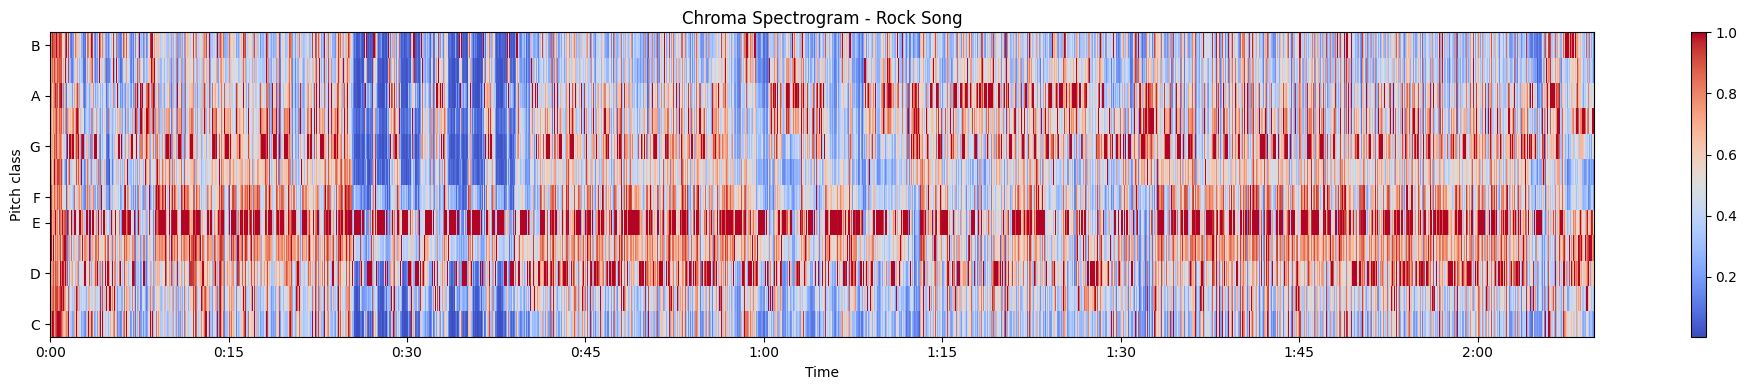

In [ ]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(chroma_rock, x_axis='time', y_axis='chroma', cmap='coolwarm', sr=sr_rock)
plt.colorbar()
plt.title("Chroma Spectrogram - Rock Song")
plt.tight_layout()
plt.show()

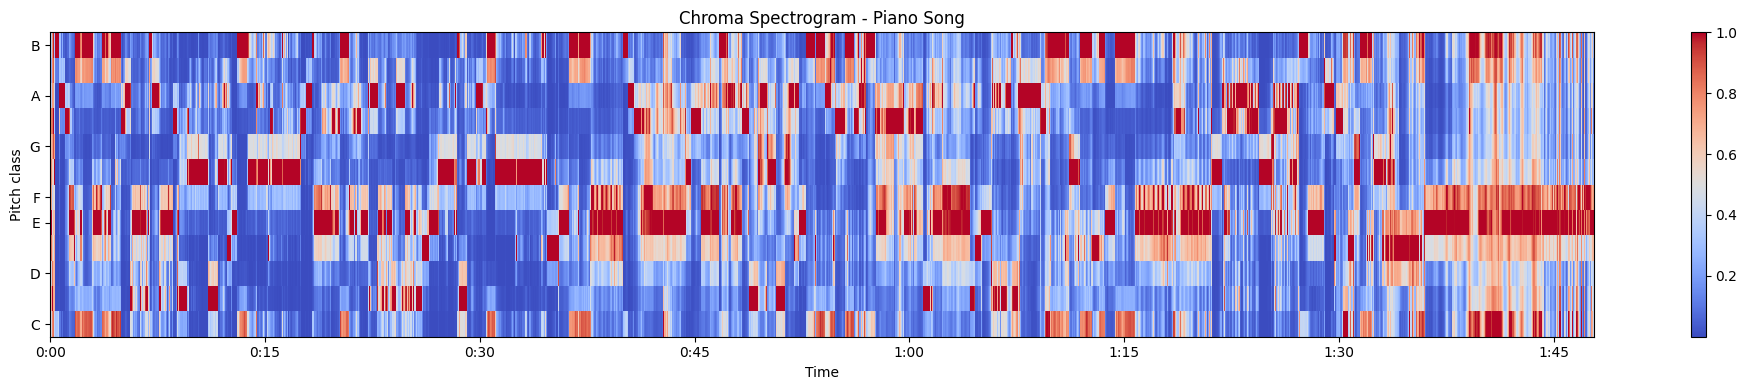

In [ ]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(chroma_piano, x_axis='time', y_axis='chroma', cmap='coolwarm', sr=sr_piano)
plt.colorbar()
plt.title("Chroma Spectrogram - Piano Song")
plt.tight_layout()
plt.show()

The chroma spectrograms above show how strongly each of the 12 musical notes is present over time. Warmer colors (red) mean a note is strongly active, while cooler colors (blue) mean it's weak or absent.

In the **rock song**, we see strong and frequent activity across several notes, This suggests richer harmony and more chord changes throughout the track. we can also spot the guitar solo that starts at 00:24.

In contrast, the **piano song** has more focused and sparse activity, with fewer notes active at any given time. This points to a simpler, more stable harmonic structure.

### Tabular features:

In [ ]:
chroma_rock_mean = np.mean(chroma_rock)
chroma_rock_std = np.std(chroma_rock)
chroma_piano_mean = np.mean(chroma_piano)
chroma_piano_std = np.std(chroma_piano)

In [ ]:
print(f"Rock Chroma \nMean: {chroma_rock_mean}, STD: {chroma_rock_std}\n")
print(f"Piano Chroma \nMean: {chroma_piano_mean}, STD: {chroma_piano_std}")

Rock Chroma 
Mean: 0.5437570214271545, STD: 0.26430240273475647

Piano Chroma 
Mean: 0.34109291434288025, STD: 0.3152942657470703


### What Do the Mean and Standard Deviation Tell Us?

- **Mean**: The **average** tells us how strong all the notes are, on average, throughout the song. For example, if the mean is **0.5437**, this means that, on average, the notes in the song are **54% as strong** as they could be.

- **Standard Deviation**: The **standard deviation** shows how much the strength of the notes **varies** in the song. A higher number means the notes change a lot (some are strong, and some are weak). A lower number means the notes stay more consistent (the strength doesn’t change much). For example, a standard deviation of **0.2643** means there is **moderate variation** in how strong each note is throughout the song.

In simple terms:
- The **mean** tells us how **present** the notes are in the song overall.
- The **standard deviation** tells us how much the **strength of the notes changes** as the song goes on.

If you want, you can even go further by computing the mean per note like this:


In [ ]:
mean_chroma_per_note_rock = np.mean(chroma_rock, axis=1)

In [ ]:
mean_chroma_per_note_rock

array([0.43114164, 0.48750407, 0.6358673 , 0.6325613 , 0.7416382 ,
       0.54904556, 0.48628575, 0.58968174, 0.5515712 , 0.52984446,
       0.44243187, 0.44750997], dtype=float32)

 but I chose not to include this in my main features, since it adds more complexity without giving a clear benefit for my current analysis.

### MFCC (Mel-Frequency Cepstral Coefficients) Features

**MFCCs** are a way to represent the timbre (tone or texture) of a sound, similar to how we hear different sounds in music. They break down the sound into 13 coefficients that describe how the sound is spread across different frequencies, based on how our ears perceive them.

In the code:
- `mfcc_rock` and `mfcc_piano` contain the MFCCs for the rock and piano songs.
- `mfcc_mean_rock` and `mfcc_mean_piano` represent the average timbre of each song.
- `mfcc_std_rock` and `mfcc_std_piano` show how much the timbre varies throughout the song.

These features are important because they capture the distinctive qualities of a sound (like a guitar or a voice) and help differentiate between songs. They are useful for tasks like recognizing instruments, genres, or even different voices

In [ ]:
mfcc_rock = librosa.feature.mfcc(y=y_rock, sr=sr_rock, n_mfcc=13)
mfcc_piano = librosa.feature.mfcc(y=y_piano, sr=sr_piano, n_mfcc=13)
mfcc_rock_mean = np.mean(mfcc_rock)
mfcc_rock_std = np.std(mfcc_rock)
mfcc_piano_mean = np.mean(mfcc_piano)
mfcc_piano_std = np.std(mfcc_piano)

In [ ]:
print(f"Rock MFCC \nMean: {mfcc_rock_mean}, Std: {mfcc_rock_std}\n")
print(f"Piano MFCC \nMean: {mfcc_piano_mean}, Std: {mfcc_piano_std}")

Rock MFCC 
Mean: 5.172155380249023, Std: 58.00202941894531

Piano MFCC 
Mean: -15.003430366516113, Std: 138.61334228515625


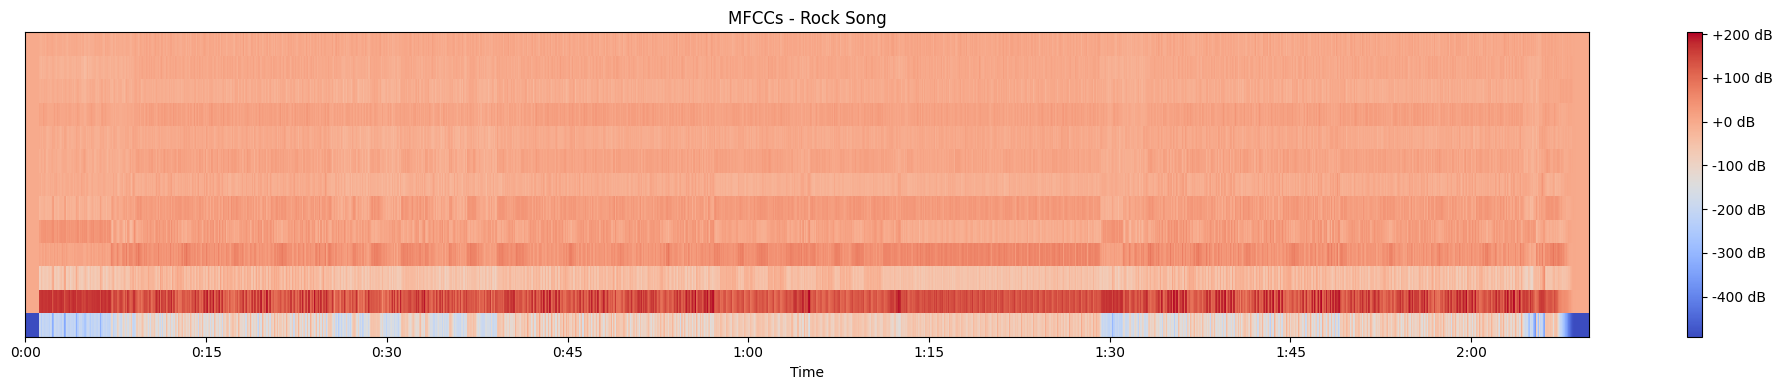

In [ ]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(mfcc_rock, x_axis='time', sr=sr_rock, cmap='coolwarm',
                         vmin=np.min(mfcc_rock), vmax=np.max(mfcc_rock))
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs - Rock Song')
plt.tight_layout()
plt.show()

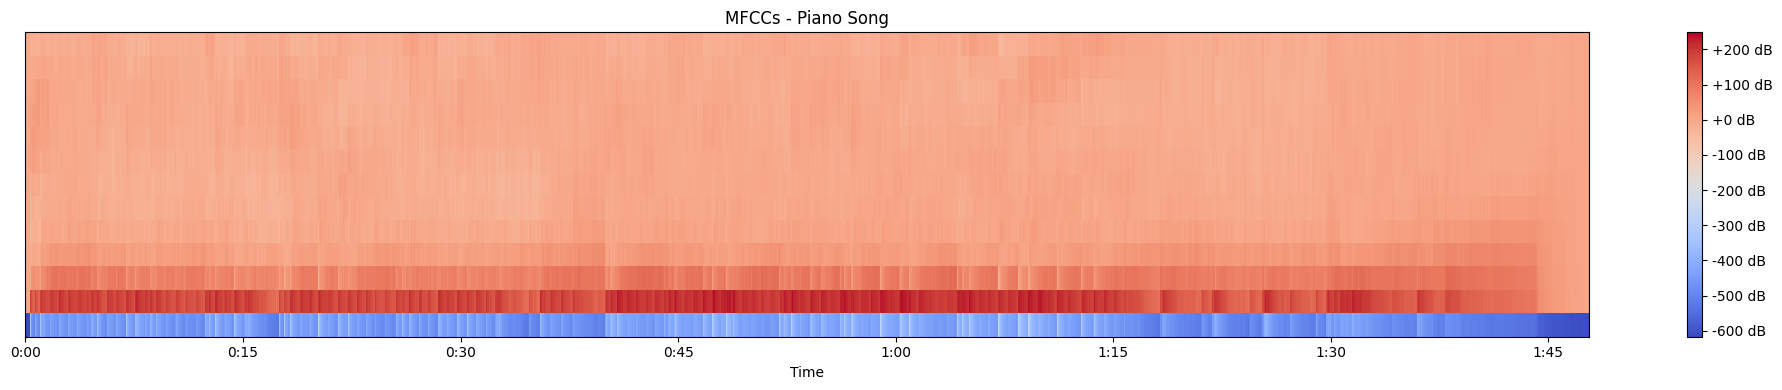

In [ ]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(mfcc_piano, x_axis='time', sr=sr_piano, cmap='coolwarm',
                         vmin=np.min(mfcc_piano), vmax=np.max(mfcc_piano))
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs - Piano Song')
plt.tight_layout()
plt.show()

These MFCC heatmaps show how the timbre (tone quality) of each song changes over time.

- The **rock song** has more variation across MFCC coefficients, showing a richer and more dynamic texture. This reflects the blend of instruments and distortion typical in rock.
- The **piano song** has smoother, more stable MFCC patterns, which matches the cleaner and more consistent sound of a solo piano.

Overall, MFCCs give us a way to compare how complex or stable the sound textures are between different types of music.

### Spectral Shape Features

These features describe how the energy of the sound is spread across low and high frequencies, in other words, they help us understand the tone or texture of the audio. Spectral features help us describe the character of the sound, and are useful for telling the difference between genres or instruments.

Just like with the other features, we calculate them over short slices of the song and then take the mean, the standard deviation and the 'maximum value'.

**To get meaningful and stable values, we remove the first 1.5 seconds from the audio before calculating the spectral features.** This avoids distortion caused by silence or noise at the beginning of the song, which can create unnatural spikes in the measurement. Trimming the start gives a better representation of the actual musical content.

**Spectral Centroid**:  represents the brightness of the sound, similar to how we perceive high frequencies. It is calculated by finding the "center" of the spectrum, which is where the majority of the signal's energy is concentrated. Higher spectral centroid values indicate a brighter, more high-pitched sound, while lower values suggest a smoother or lower-pitched sound.

In simpler words, this tells us where the "center" of the sound is — if the sound feels more bright and sharp, the centroid will be higher. If it's deep and warm, it will be lower.

In [ ]:
centroid_rock_full = librosa.feature.spectral_centroid(y=y_rock, sr=sr_rock)
centroid_piano_full = librosa.feature.spectral_centroid(y=y_piano, sr=sr_piano)

frame_times_rock = librosa.frames_to_time(np.arange(centroid_rock_full.shape[1]), sr=sr_rock)
frame_times_piano = librosa.frames_to_time(np.arange(centroid_piano_full.shape[1]), sr=sr_piano)

centroid_rock = centroid_rock_full[0][frame_times_rock > 1.5]
centroid_piano = centroid_piano_full[0][frame_times_piano > 1.5]

centroid_rock_mean = np.mean(centroid_rock)
centroid_rock_std = np.std(centroid_rock)
centroid_rock_max = np.max(centroid_rock)

centroid_piano_mean = np.mean(centroid_piano)
centroid_piano_std = np.std(centroid_piano)
centroid_piano_max = np.max(centroid_piano)

In [ ]:
print(f"Rock spectral sentroid \nMean: {centroid_rock_mean}, Std: {centroid_rock_std}, Max: {centroid_rock_max}\n")
print(f"Piano spectral sentroid \nMean: {centroid_piano_mean}, Std: {centroid_piano_std}, Max: {centroid_piano_max}")

Rock spectral sentroid 
Mean: 2879.353964704762, Std: 840.0407248005185, Max: 6246.359708879623

Piano spectral sentroid 
Mean: 544.4684158845566, Std: 292.2631326805015, Max: 3825.441110834253


The average specral centroid for the rock song is much higher (2928.68) then the piano song (558.57) meaning the more energy in high frequencies: typical for rock songs

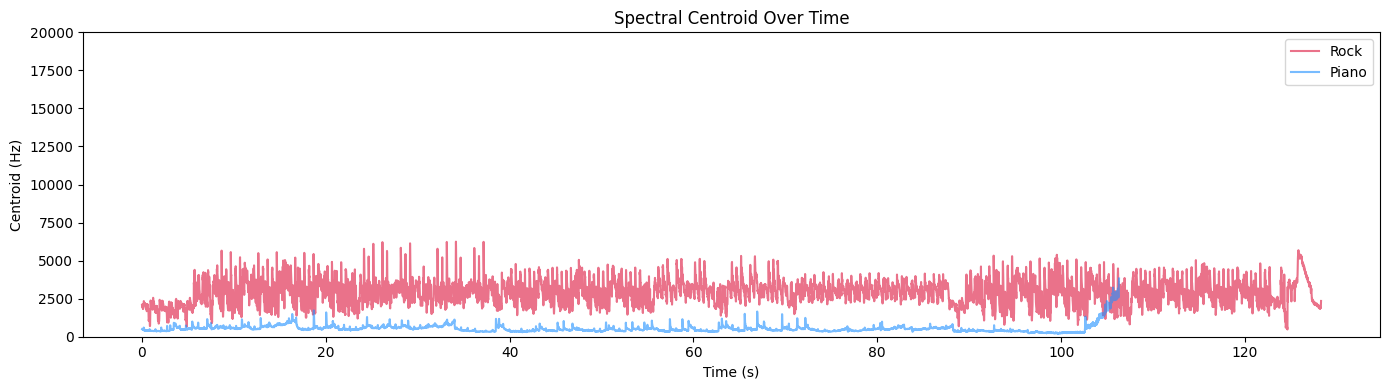

In [ ]:
t_rock_trimmed = librosa.frames_to_time(np.arange(1, len(centroid_rock) + 1), sr=sr_rock)
t_piano_trimmed = librosa.frames_to_time(np.arange(1, len(centroid_piano) + 1), sr=sr_piano)

# Plot
plt.figure(figsize=(14, 4))
plt.plot(t_rock_trimmed, centroid_rock, label='Rock', color='#DC143C', alpha=0.6)
plt.plot(t_piano_trimmed, centroid_piano, label='Piano', color='#1E90FF', alpha=0.6)
plt.title('Spectral Centroid Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Centroid (Hz)')
plt.ylim(0, 20000)
plt.legend()
plt.tight_layout()
plt.show()

**Spectral Bandwidth**: This tells us how **wide or narrow** the sound is. A higher spectral bandwidth means the sound has more complex frequency content. It is calculated as the standard deviation of the spectrum.


In [ ]:
bandwidth_rock_full = librosa.feature.spectral_bandwidth(y=y_rock, sr=sr_rock)
bandwidth_piano_full = librosa.feature.spectral_bandwidth(y=y_piano, sr=sr_piano)

frame_times_rock = librosa.frames_to_time(np.arange(bandwidth_rock_full.shape[1]), sr=sr_rock)
frame_times_piano = librosa.frames_to_time(np.arange(bandwidth_piano_full.shape[1]), sr=sr_piano)

bandwidth_rock = bandwidth_rock_full[0][frame_times_rock > 1.5]
bandwidth_piano = bandwidth_piano_full[0][frame_times_piano > 1.5]

bandwidth_rock_mean = np.mean(bandwidth_rock)
bandwidth_rock_std = np.std(bandwidth_rock)
bandwidth_rock_max = np.max(bandwidth_rock)

bandwidth_piano_mean = np.mean(bandwidth_piano)
bandwidth_piano_std = np.std(bandwidth_piano)
bandwidth_piano_max = np.max(bandwidth_piano)

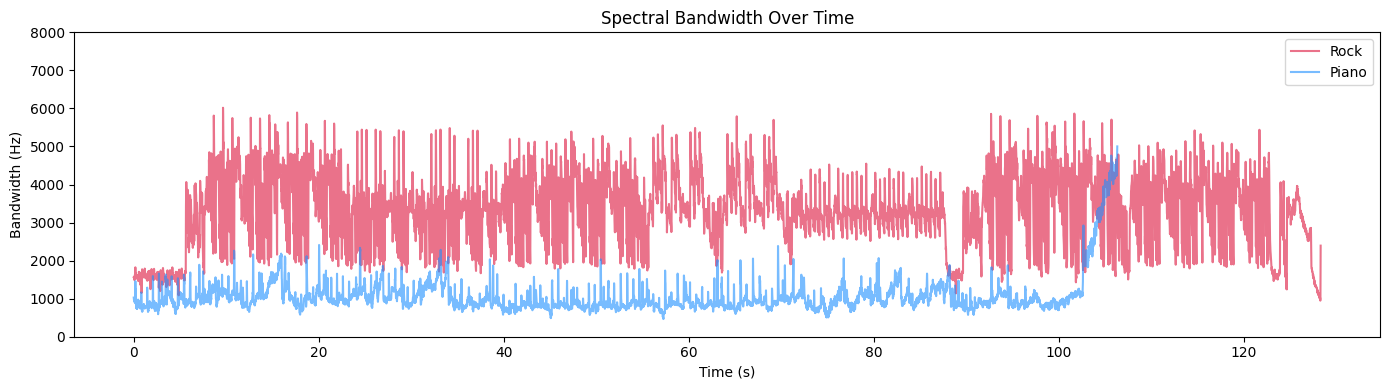

In [ ]:
t_rock_trimmed = librosa.frames_to_time(np.arange(1, len(bandwidth_rock) + 1), sr=sr_rock)
t_piano_trimmed = librosa.frames_to_time(np.arange(1, len(bandwidth_piano) + 1), sr=sr_piano)

plt.figure(figsize=(14, 4))
plt.plot(t_rock_trimmed, bandwidth_rock, label='Rock', color='#DC143C', alpha=0.6)
plt.plot(t_piano_trimmed, bandwidth_piano, label='Piano', color='#1E90FF', alpha=0.6)
plt.title('Spectral Bandwidth Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Bandwidth (Hz)')
plt.ylim(0, 8000)
plt.legend()
plt.tight_layout()
plt.show()

**Spectral Rolloff** is the frequency below which a specified percentage (usually 85%) of the total energy of the signal is contained. It helps distinguish between harmonic sounds (like music) and non-harmonic sounds (like noise).

In [ ]:
rolloff_rock_full = librosa.feature.spectral_rolloff(y=y_rock, sr=sr_rock)
rolloff_piano_full = librosa.feature.spectral_rolloff(y=y_piano, sr=sr_piano)

frame_times_rock = librosa.frames_to_time(np.arange(rolloff_rock_full.shape[1]), sr=sr_rock)
frame_times_piano = librosa.frames_to_time(np.arange(rolloff_piano_full.shape[1]), sr=sr_piano)

rolloff_rock = rolloff_rock_full[0][frame_times_rock > 1.5]
rolloff_piano = rolloff_piano_full[0][frame_times_piano > 1.5]

rolloff_rock_mean = np.mean(rolloff_rock)
rolloff_rock_std = np.std(rolloff_rock)
rolloff_rock_max = np.max(rolloff_rock)

rolloff_piano_mean = np.mean(rolloff_piano)
rolloff_piano_std = np.std(rolloff_piano)
rolloff_piano_max = np.max(rolloff_piano)

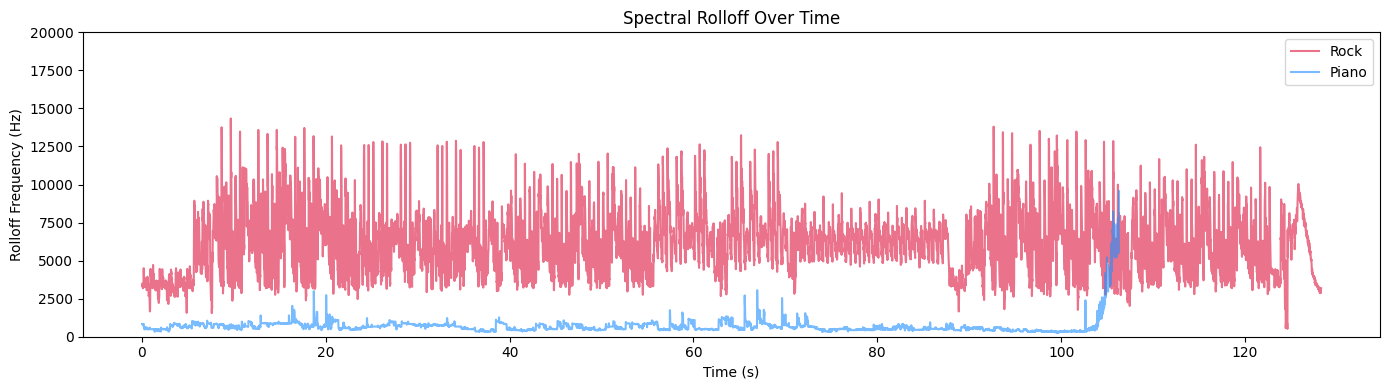

In [ ]:
t_rock_trimmed = librosa.frames_to_time(np.arange(1, len(rolloff_rock) + 1), sr=sr_rock)
t_piano_trimmed = librosa.frames_to_time(np.arange(1, len(rolloff_piano) + 1), sr=sr_piano)

plt.figure(figsize=(14, 4))
plt.plot(t_rock_trimmed, rolloff_rock, label='Rock', color='#DC143C', alpha=0.6)
plt.plot(t_piano_trimmed, rolloff_piano, label='Piano', color='#1E90FF', alpha=0.6)
plt.title('Spectral Rolloff Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Rolloff Frequency (Hz)')
plt.legend()
plt.ylim(0, 20000)
plt.tight_layout()
plt.show()

#### Spectral Contrast Feature:
Spectral contrast measures the difference in amplitude between the peaks and valleys in the sound spectrum. It tells us how sharp or smooth the sound is. A higher spectral contrast means the sound has more sharp peaks and deep valleys, while a lower contrast means the sound is smoother and more even.

First, we calculate the spectral contrast for each **frame** of the audio signal across **7 frequency bands**.

To turn this into a compact tabular feature:
- We take the **mean** contrast value **for each frequency band** across the whole song.
- We also calculate the **standard deviation** and **maximum** values per band, to capture the variation and peaks.

This gives us a simple but rich description of the **overall texture** of the song.

In [ ]:
contrast_rock_full = librosa.feature.spectral_contrast(y=y_rock, sr=sr_rock)
contrast_piano_full = librosa.feature.spectral_contrast(y=y_piano, sr=sr_piano)

frame_times_rock = librosa.frames_to_time(np.arange(contrast_rock_full.shape[1]), sr=sr_rock)
frame_times_piano = librosa.frames_to_time(np.arange(contrast_piano_full.shape[1]), sr=sr_piano)

contrast_rock = contrast_rock_full[0][frame_times_rock > 1.5]
contrast_piano = contrast_piano_full[0][frame_times_piano > 1.5]

contrast_rock_mean = np.mean(contrast_rock)
contrast_rock_std = np.std(contrast_rock)
contrast_rock_max = np.max(contrast_rock)

contrast_piano_mean = np.mean(contrast_piano)
contrast_piano_std = np.std(contrast_piano)
contrast_piano_max = np.max(contrast_piano)

**Spectral Flatness**: Tells us if the sound is more like pure musical notes or more like noise.  
  A musical note has energy focused in a few places, while noisy sounds spread energy everywhere.


In [ ]:
flatness_rock_full = librosa.feature.spectral_flatness(y=y_rock)
flatness_piano_full = librosa.feature.spectral_flatness(y=y_piano)

frame_times_rock = librosa.frames_to_time(np.arange(flatness_rock_full.shape[1]), sr=sr_rock)
frame_times_piano = librosa.frames_to_time(np.arange(flatness_piano_full.shape[1]), sr=sr_piano)

flatness_rock = flatness_rock_full[0][frame_times_rock > 1.5]
flatness_piano = flatness_piano_full[0][frame_times_piano > 1.5]

flatness_rock_mean = np.mean(flatness_rock)
flatness_rock_std = np.std(flatness_rock)
flatness_rock_max = np.max(flatness_rock)

flatness_piano_mean = np.mean(flatness_piano)
flatness_piano_std = np.std(flatness_piano)
flatness_piano_max = np.max(flatness_piano)

###  Onset Strength Features

Onset strength measures **how strong new sounds or notes appear** during a song.  
It captures the **energy and intensity** of attacks in the music — like drum hits, guitar strums, or sudden notes.

We calculate the onset strength envelope for the song, and then summarize it into simple tabular features:

---

### What each calculation means:

- **Mean Onset Strength**:  
  The average strength of all attacks throughout the song.  
  A higher mean means the song is generally more energetic.

- **Standard Deviation of Onset Strength**:  
  How much the attack strength changes over time.  
  A high standard deviation means the song has both strong and soft moments (dynamic playing).

- **Maximum Onset Strength**:  
  The strongest single attack detected in the song.  
  Helps identify songs with very powerful moments (like a strong drum hit).

---

### Why these features are useful

- Rock songs usually have **higher mean**, **higher standard deviation**,
and **stronger maximums**.
- Piano songs usually show **lower values** for all these features, because they are smoother and less attack-driven.

Together, these features describe **how powerful and active** the rhythmic structure of the song feels.


In [ ]:
onset_env_rock = librosa.onset.onset_strength(y=y_rock, sr=sr_rock)
onset_env_piano = librosa.onset.onset_strength(y=y_piano, sr=sr_piano)

onset_strength_rock_mean = np.mean(onset_env_rock)
onset_strength_rock_std = np.std(onset_env_rock)
onset_strength_rock_max = np.max(onset_env_rock)

onset_strength_piano_mean = np.mean(onset_env_piano)
onset_strength_piano_std = np.std(onset_env_piano)
onset_strength_piano_max = np.max(onset_env_piano)

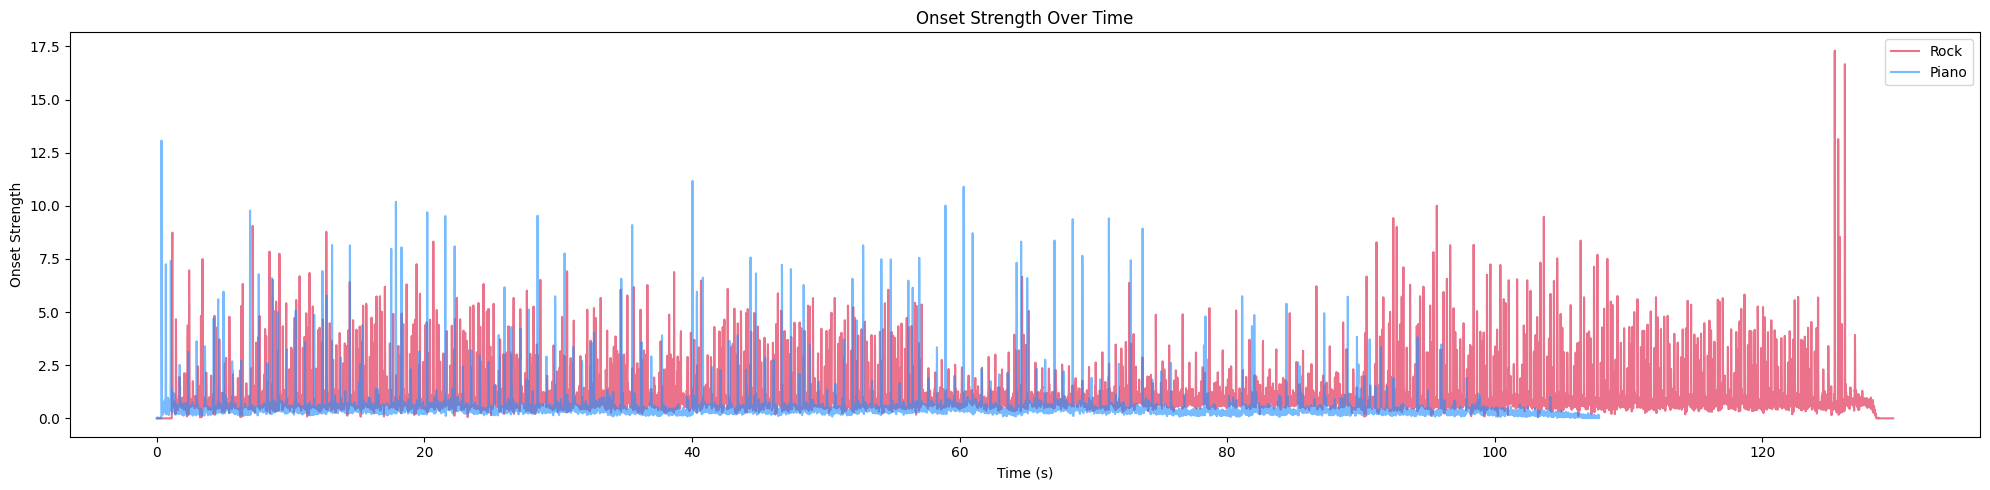

In [ ]:
# Create time axis
t_rock = librosa.frames_to_time(range(len(onset_env_rock)), sr=sr_rock)
t_piano = librosa.frames_to_time(range(len(onset_env_piano)), sr=sr_piano)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(t_rock, onset_env_rock, label='Rock', color = '#DC143C', alpha=0.6)
plt.plot(t_piano, onset_env_piano, label='Piano', color = '#1E90FF', alpha=0.6)
plt.title('Onset Strength Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Onset Strength')
plt.legend()
plt.tight_layout()
plt.show()

### Low, Mid, and High Frequency Energy Ratios

We calculate how much energy the song has in three different frequency ranges:

- **Low frequencies** (below 500 Hz):  
  This is where bass instruments, kick drums, and lower notes live.

- **Mid frequencies** (500–2000 Hz):  
  This range holds vocals, guitars, pianos, and most melodies.

- **High frequencies** (above 2000 Hz):  
  This area includes cymbals, hi-hats, and the brightness of the sound.

---

### How We Calculate the Feature

- We compute the energy in each frequency range for every moment of the song.
- Then we calculate the **average ratio** of low, mid, and high energy compared to the total energy.

---

### What It Tells Us

This feature shows the **tonal balance** of the song:

- Rock songs might have more energy spread across mid and high frequencies (guitars, cymbals).
- Piano songs may concentrate more energy in the mid frequencies, depending on the style.

It gives a simple but powerful description of **how the energy is distributed** across the sound spectrum.


In [ ]:
# ROCK

# Calculate the STFT and frequency bins
spec_rock = np.abs(librosa.stft(y_rock, n_fft=2048))
freq_bins = librosa.fft_frequencies(sr=sr_rock, n_fft=2048)

# Define frequency bands
low_idx = np.where(freq_bins < 500)[0]
mid_idx = np.where((freq_bins >= 500) & (freq_bins < 2000))[0]
high_idx = np.where(freq_bins >= 2000)[0]

# Sum energy across bands
low_energy_rock = np.sum(spec_rock[low_idx, :], axis=0)
mid_energy_rock = np.sum(spec_rock[mid_idx, :], axis=0)
high_energy_rock = np.sum(spec_rock[high_idx, :], axis=0)

# Total energy
total_energy_rock = low_energy_rock + mid_energy_rock + high_energy_rock

# Avoid division by zero
valid_rock = total_energy_rock > 0
low_ratio_rock = np.zeros_like(total_energy_rock)
mid_ratio_rock = np.zeros_like(total_energy_rock)
high_ratio_rock = np.zeros_like(total_energy_rock)

low_ratio_rock[valid_rock] = low_energy_rock[valid_rock] / total_energy_rock[valid_rock]
mid_ratio_rock[valid_rock] = mid_energy_rock[valid_rock] / total_energy_rock[valid_rock]
high_ratio_rock[valid_rock] = high_energy_rock[valid_rock] / total_energy_rock[valid_rock]

# Summary features
low_energy_ratio_rock = np.mean(low_ratio_rock)
mid_energy_ratio_rock = np.mean(mid_ratio_rock)
high_energy_ratio_rock = np.mean(high_ratio_rock)


# PIANO -same steps
spec_piano = np.abs(librosa.stft(y_piano, n_fft=2048))
freq_bins = librosa.fft_frequencies(sr=sr_piano, n_fft=2048)

low_energy_piano = np.sum(spec_piano[low_idx, :], axis=0)
mid_energy_piano = np.sum(spec_piano[mid_idx, :], axis=0)
high_energy_piano = np.sum(spec_piano[high_idx, :], axis=0)

total_energy_piano = low_energy_piano + mid_energy_piano + high_energy_piano

valid_piano = total_energy_piano > 0
low_ratio_piano = np.zeros_like(total_energy_piano)
mid_ratio_piano = np.zeros_like(total_energy_piano)
high_ratio_piano = np.zeros_like(total_energy_piano)

low_ratio_piano[valid_piano] = low_energy_piano[valid_piano] / total_energy_piano[valid_piano]
mid_ratio_piano[valid_piano] = mid_energy_piano[valid_piano] / total_energy_piano[valid_piano]
high_ratio_piano[valid_piano] = high_energy_piano[valid_piano] / total_energy_piano[valid_piano]

low_energy_ratio_piano = np.mean(low_ratio_piano)
mid_energy_ratio_piano = np.mean(mid_ratio_piano)
high_energy_ratio_piano = np.mean(high_ratio_piano)


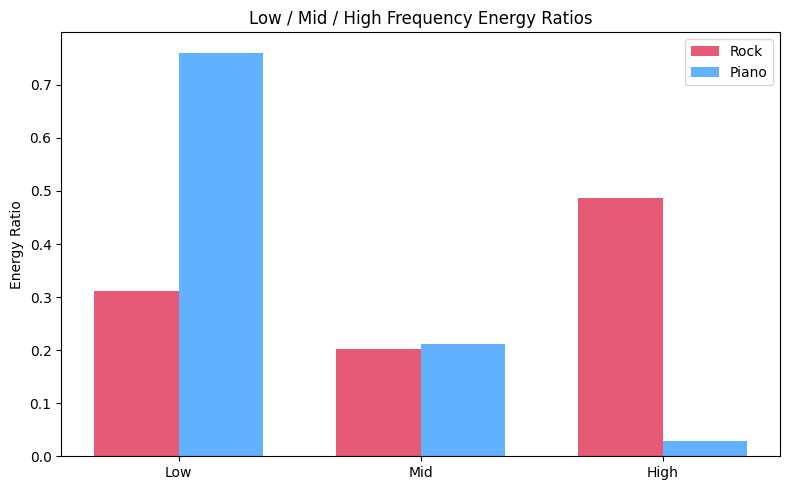

In [ ]:
bands = ['Low', 'Mid', 'High']
rock_ratios = [low_energy_ratio_rock, mid_energy_ratio_rock, high_energy_ratio_rock]
piano_ratios = [low_energy_ratio_piano, mid_energy_ratio_piano, high_energy_ratio_piano]

x = np.arange(len(bands))
bar_width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, rock_ratios, bar_width, label='Rock', color = '#DC143C', alpha=0.7)
plt.bar(x + bar_width/2, piano_ratios, bar_width, label='Piano', color = '#1E90FF', alpha=0.7)

plt.xticks(x, bands)
plt.ylabel('Energy Ratio')
plt.title('Low / Mid / High Frequency Energy Ratios')
plt.legend()
plt.tight_layout()
plt.show()


## Now lets make a tabular data frame:

In [ ]:
data = {
    'song': ['Rock', 'Classical Piano'],
    'tempo': [tempo_rock[0], tempo_piano[0]],
    'beat_count': [beat_count_rock, beat_count_piano],
    'harmonic_average': [harmonic_rock_mean, harmonic_piano_mean],
    'harmonic_median': [harmonic_rock_median, harmonic_piano_median],
    'harmonic_min': [harmonic_rock_min, harmonic_piano_min],
    'harmonic_max': [harmonic_rock_max, harmonic_piano_max],
    'percussive_average': [percussive_rock_mean, percussive_piano_mean],
    'percussive_median': [percussive_rock_median, percussive_piano_median],
    'percussive_min': [percussive_rock_min, percussive_piano_min],
    'percussive_max': [percussive_rock_max, percussive_piano_max],
    'rms_average': [rms_rock_mean, rms_piano_mean],
    'rms_std': [rms_rock_std, rms_piano_std],
    'rms_max': [rms_rock_max, rms_piano_max],
    'dynamic_range': [dynamic_range_rock, dynamic_range_piano],
    'zero_crossing_rate_average': [zcr_rock_mean, zcr_piano_mean],
    'zero_crossing_rate_std': [zcr_rock_std, zcr_piano_std],
    'chroma_average': [chroma_rock_mean, chroma_piano_mean],
    'chroma_std': [chroma_rock_std, chroma_piano_std],
    'MFCC_average': [mfcc_rock_mean, mfcc_piano_mean],
    'MFCC_std': [mfcc_rock_std, mfcc_piano_std],
    'spectral_centroid_average': [centroid_rock_mean, centroid_piano_mean],
    'spectral_centroid_std': [centroid_rock_std, centroid_piano_std],
    'spectral_centroid_max': [centroid_rock_max, centroid_piano_max],
    'spectral_bandwidth_average': [bandwidth_rock_mean, bandwidth_piano_mean],
    'spectral_bandwidth_std': [bandwidth_rock_std, bandwidth_piano_std],
    'spectral_bandwidth_max': [bandwidth_rock_max, bandwidth_piano_max],
    'spectral_rolloff_average': [rolloff_rock_mean, rolloff_piano_mean],
    'spectral_rolloff_std': [rolloff_rock_std, rolloff_piano_std],
    'spectral_rolloff_max': [rolloff_rock_max, rolloff_piano_max],
    'spectral_contrast_average': [contrast_rock_mean, contrast_piano_mean],
    'spectral_contrast_std': [contrast_rock_std, contrast_piano_std],
    'spectral_contrast_max': [contrast_rock_max, contrast_piano_max],
    'spectral_flatness_average': [flatness_rock_mean, flatness_piano_mean],
    'spectral_flatness_std': [flatness_rock_std, flatness_piano_std],
    'spectral_flatness_max': [flatness_rock_max, flatness_piano_max],
    'onset_strength_average': [onset_strength_rock_mean, onset_strength_piano_mean],
    'onset_strength_std': [onset_strength_rock_std, onset_strength_piano_std],
    'onset_strength_max': [onset_strength_rock_max, onset_strength_piano_max],
    'low_energy_ratio': [low_energy_ratio_rock, low_energy_ratio_piano],
    'mid_energy_ratio': [mid_energy_ratio_rock, mid_energy_ratio_piano],
    'high_energy_ratio': [high_energy_ratio_rock, high_energy_ratio_piano]
}


df = pd.DataFrame(data)

In [ ]:
df.head(1)

,song,tempo,beat_count,harmonic_average,harmonic_median,harmonic_min,harmonic_max,percussive_average,percussive_median,percussive_min,...,spectral_contrast_max,spectral_flatness_average,spectral_flatness_std,spectral_flatness_max,onset_strength_average,onset_strength_std,onset_strength_max,low_energy_ratio,mid_energy_ratio,high_energy_ratio
0,Rock,120.18532,252,0.044637,0.030057,-0.3812,0.373947,0.005445,0.002843,-0.534461,...,60.366224,0.003353,0.043996,1.000001,1.082909,1.015476,17.301643,0.31125,0.20238,0.486371
